# Modeling for "Bank Aditional Data"

In [1]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

data_dummies = pd.get_dummies(data)
del data_dummies["duration"]
del data_dummies["y_no"]



/home/alberto/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'y yes')

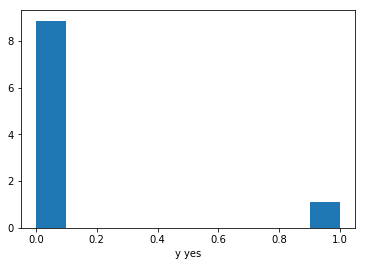

In [3]:
plt.hist(data_dummies.iloc[:,-1], normed=True)
plt.xlabel("y yes")

SVC clasifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
xdata = data_dummies.iloc[:,0:-1]
ydata = data_dummies.iloc[:,-1]
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(xdata[:-1],ydata[:-1])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [5]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)
score = cross_val_score(clf, xdata, ydata,cv=kfold, n_jobs=-1 )
print('Avarage acc : {} %'.format(np.mean(score)*100))


Avarage acc : 87.6824317497 %


Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41187,74,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,1,0,0


Confusion matrix, without normalization


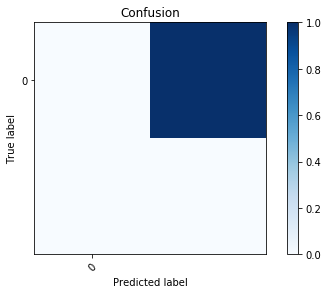

In [12]:
y_pred = clf.predict(xdata[-1:])
cnf_matrix = confusion_matrix(ydata[-1:],y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(ydata[-1:])), normalize= False, title='Confusion')


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis =0)
indices = np.argsort(importances)[::-1]

print("feature ranking :")
features = xdata[:0].columns
for f in range(len(features)):
    print("%d. %s (%f)" % (f +1, features[f], importances[indices[f]]))

feature ranking :
1. age (0.156077)
2. campaign (0.105185)
3. pdays (0.100372)
4. previous (0.046005)
5. emp.var.rate (0.038988)
6. cons.price.idx (0.028829)
7. cons.conf.idx (0.021235)
8. euribor3m (0.020851)
9. nr.employed (0.020826)
10. job_admin. (0.017172)
11. job_blue-collar (0.016557)
12. job_entrepreneur (0.016511)
13. job_housemaid (0.016305)
14. job_management (0.015798)
15. job_retired (0.015445)
16. job_self-employed (0.015038)
17. job_services (0.014820)
18. job_student (0.014756)
19. job_technician (0.014552)
20. job_unemployed (0.014227)
21. job_unknown (0.014222)
22. marital_divorced (0.014003)
23. marital_married (0.013941)
24. marital_single (0.013801)
25. marital_unknown (0.011864)
26. education_basic.4y (0.011734)
27. education_basic.6y (0.011126)
28. education_basic.9y (0.011007)
29. education_high.school (0.010906)
30. education_illiterate (0.009358)
31. education_professional.course (0.009101)
32. education_university.degree (0.008882)
33. education_unknown (0.00